### $2.$ Cluster Analysis

Book: Practical Guide to Cluster Analysis in R: Unsupervised Machine Learning (Multivariate Analysis)

### K-means Cluster Analysis 

K-means is another unsupervised learning algorithm whose main goal is to partition the data in non-overlapping clusters of elements from the data.

The k-means algorithm can be itemized as:

1. Determine the number of clusters (this can be a random guess)
2. Construct distance matrix by randoming locating k number of points as the cluster center 
3. add observations to closest centroid based on some measurement of similarity (or dissimilarity)
4. For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster. The centroid of a Kth cluster is a vector of length p containing the means of all variables for the observations in the kth cluster; p is the number of variables.
5. Iteratively minimize the total within sum of square. That is, iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached. By default, the R software uses 10 as the default value for the maximum number of iterations.
6. Based on the intrinsic properties of each k of clusters, investigate the best k for the model.

In order to better understand this algorithm we will use a recurrent example from the UC Business Analytics R Programming Guide [http://uc-r.github.io/kmeans_clustering](http://uc-r.github.io/kmeans_clustering). On the USAarrests dataset.

In [3]:
install.packages("factoextra")

In [4]:
library()

In [5]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) 

df <- USArrests
df <- na.omit(df) ##remove any missing values
df <- scale(df)
head(df)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


### Distance measurements:

It is important to understand that there are many distance measurements that give weight to different properties of each group of points. The most commonly use is the euclidean distance which is derived from the geometric calculation of distances of two points on a plane:

$ d_{ecu}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

Some other examples of distance measurements are: manhattan, canberra, pearson correlation distance (widely used in gene expression analysis), spearman correlation (computes correlation between the rank of x and the ran of y variables).

#### Lets compute the matrix distance

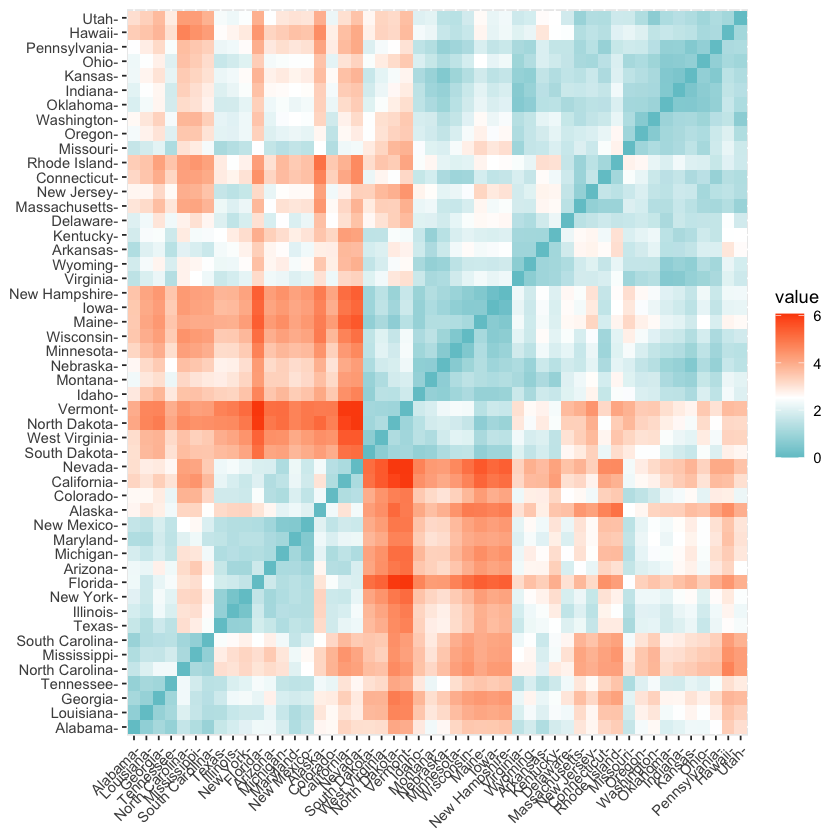

In [6]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07")) ##Red more dissimilar 
#- blue more similar

We can start computing the k-means by starting splitting the data in 2 clusters. the nstart argument attempts on multiple configurations and extracts the best one.

In [7]:
k2 <- kmeans(df, centers = 2, nstart = 25)
str(k2)

List of 9
 $ cluster     : Named int [1:50] 2 2 2 1 2 2 1 1 2 2 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] -0.67 1.005 -0.676 1.014 -0.132 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 56.1 46.7
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 30 20
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


The output of kmeans is a list of arguments. The most important being:

-  cluster: A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
-  centers: A matrix of cluster centers.
-  totss: The total sum of squares.
-  withinss: Vector of within-cluster sum of squares, one component per cluster.
-  tot.withinss: Total within-cluster sum of squares, i.e. sum(withinss).
-  betweenss: The between-cluster sum of squares, i.e. $totss-tot.withinss$.
-  size: The number of points in each cluster.

In [8]:
k2

K-means clustering with 2 clusters of sizes 30, 20

Cluster means:
     Murder    Assault   UrbanPop       Rape
1 -0.669956 -0.6758849 -0.1317235 -0.5646433
2  1.004934  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              2              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              2              1              2              2 
       Montana    

We can spatially represent the clustering arrangement of the data by producing a PCA plot with the two main components and extrapollating the data onto this two-dimensional space. The function fviz_cluster produces this plot.

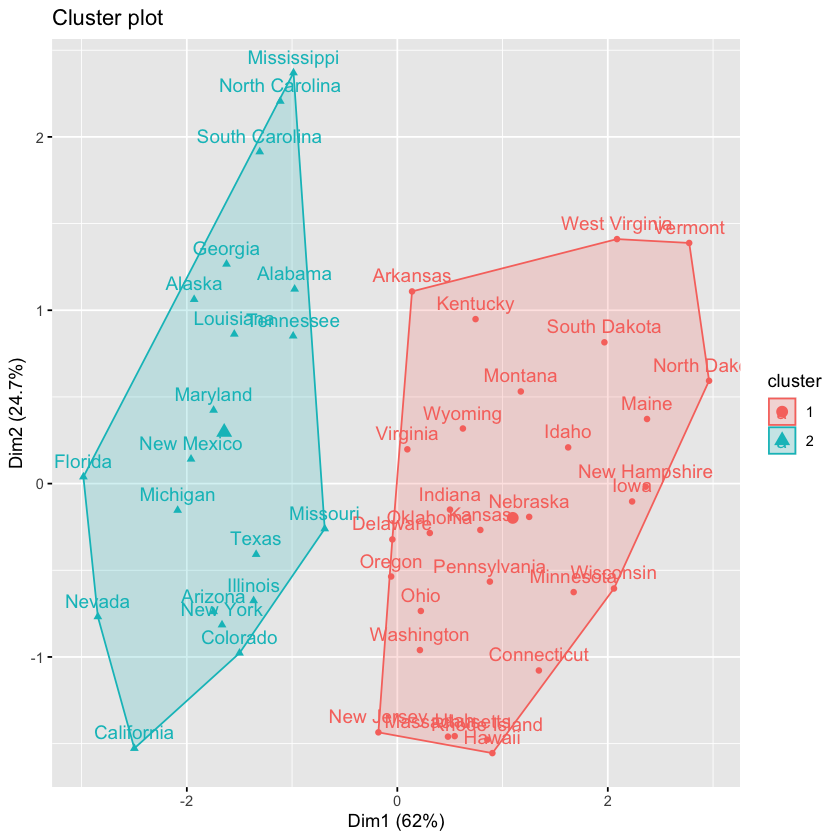

In [9]:
fviz_cluster(k2, data = df)

Antother alternative is to produce simple scatterplots for each pair of variables (the highest correlated - the highest uncorrelated??) and compare with the PCA plot.

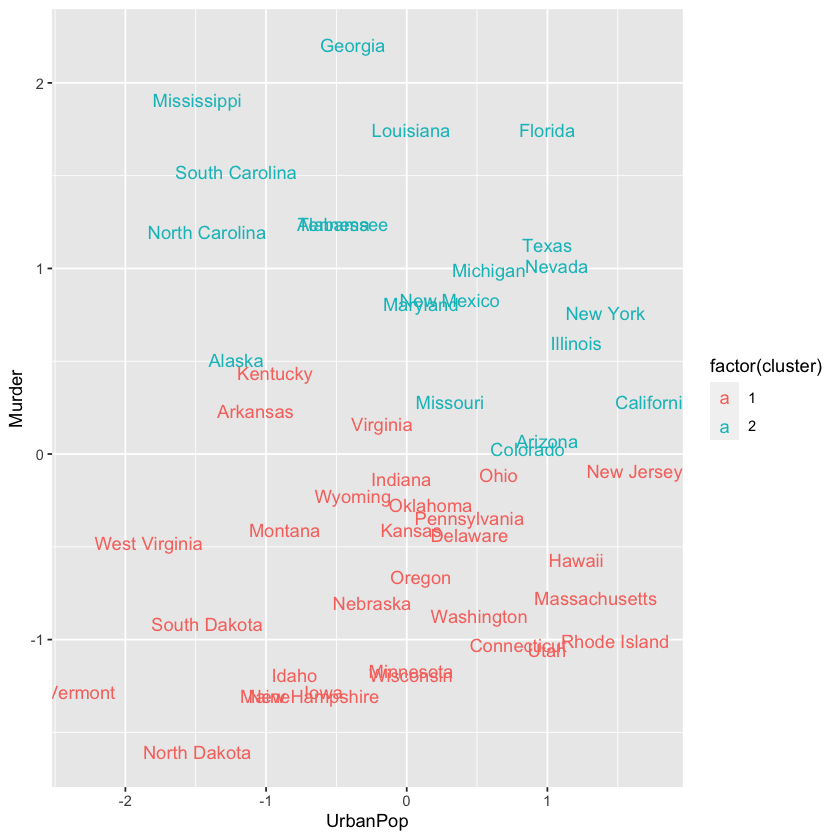

In [10]:
df %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster,
         state = row.names(USArrests)) %>%
  ggplot(aes(UrbanPop, Murder, color = factor(cluster), label = state)) +
  geom_text()

### How do we know how many clusters should we select to get the best overall clustering?

There are many methods that permit evaluate the optimal number of clusters. In here we will explain only one method the Elbow Methods, but the website given previously includes two more methods (Silhouette and Gap statistic)

Elbow Method:

Remember that the main goal of clustering is to minimize the within-cluster variation. The total within-cluster sum of square (similar to an ANOVA or a regression), measures how much variance there is in the clusters.

The algorithm for the Elbow method basically calculates the wss for multiple $k$ values (e.g. 1 to 10 clusters), and plot the curve of wss vs the number of clusters


In [ ]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [ ]:
set.seed(123)

fviz_nbclust(df, kmeans, method = "wss")

In [ ]:
# Compute k-means clustering with k = 4
set.seed(123)
final <- kmeans(df, 4, nstart = 25)
print(final)

In [ ]:
fviz_cluster(final, data = df)